🎤 Speak into the microphone...


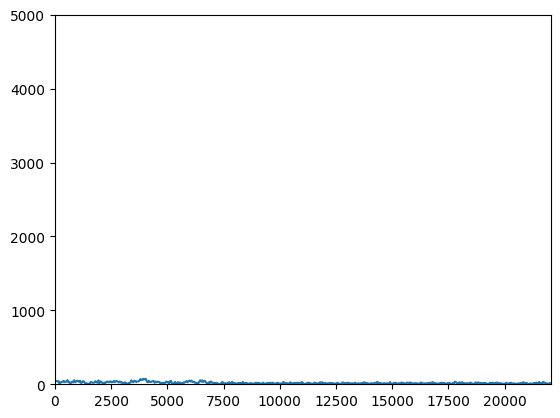


🔴 Stopping...


In [7]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Audio Stream Parameters
CHUNK = 1024  # Number of samples per frame
FORMAT = pyaudio.paInt16  # Audio format (16-bit PCM)
CHANNELS = 1  # Mono audio
RATE = 44100  # Sampling rate (CD quality)

# Initialize PyAudio
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, 
                input=True, frames_per_buffer=CHUNK)

# Setup Matplotlib for real-time plotting
plt.ion()
fig, ax = plt.subplots()
x = np.fft.fftfreq(CHUNK, 1/RATE)[:CHUNK//2]  # Frequency axis
line, = ax.plot(x, np.zeros(CHUNK//2))  # Empty plot
ax.set_xlim(0, RATE//2)  # Limit x-axis to half the sample rate (Nyquist limit)
ax.set_ylim(0, 5000)  # Adjust amplitude range

print("🎤 Speak into the microphone...")

try:
    while True:
        # Read audio chunk
        data = np.frombuffer(stream.read(CHUNK), dtype=np.int16)
        
        # Apply FFT
        fft_data = np.abs(scipy.fftpack.fft(data))[:CHUNK//2]
        
        # Update plot
        line.set_ydata(fft_data)
        plt.pause(0.01)
except KeyboardInterrupt:
    print("\n🔴 Stopping...")
    stream.stop_stream()
    stream.close()
    p.terminate()
    plt.close()
